In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from scipy import signal
import random

In [2]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

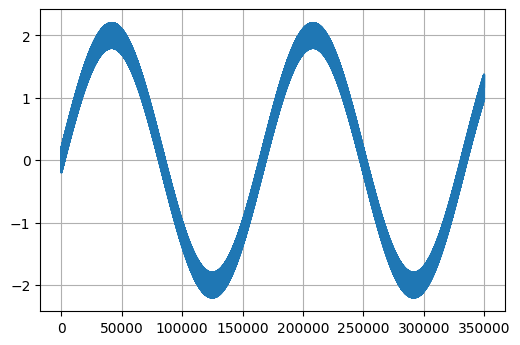

In [3]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(normal_signal)
plt.grid()

In [4]:
#  generate noise Arc 1 signal

n2 = 3000000 # 3MHz
np.random.seed(222)
random_mag_Arc1 = np.random.uniform(0.5, 0.8, 1500)
signal_Arc1 = random_mag_Arc1*np.sin(2*np.pi*n2*t[82500:84000]) # random magnitude 0.5 ~ 1

# total signal
ext_signal_Arc1 = normal_signal[82500:84000] + signal_Arc1


In [5]:
#  generate noise Arc 2 signal

n3 = 1000000 # 3MHz
np.random.seed(222)
random_mag_Arc2 = np.random.uniform(0.5, 0.8, 1500)
signal_Arc2 = random_mag_Arc2*np.sin(2*np.pi*n3*t[82500:84000]) # random magnitude 0.5 ~ 1

# total signal
ext_signal_Arc2 = normal_signal[82500:84000] + signal_Arc2


In [15]:
#  generate noise Arc 3 signal

n4 = 2000000 # 3MHz
np.random.seed(222)
random_mag_Arc3 = np.random.uniform(0.5, 0.8, 1500)
signal_Arc3 = random_mag_Arc2*np.sin(2*np.pi*n4*t[82500:84000]) # random magnitude 0.5 ~ 1

# total signal
ext_signal_Arc3 = normal_signal[82500:84000] + signal_Arc3


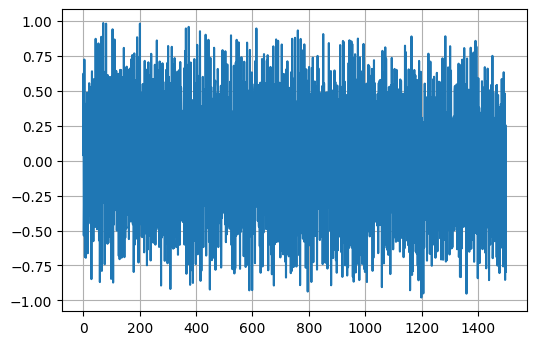

In [6]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc1)
plt.grid()

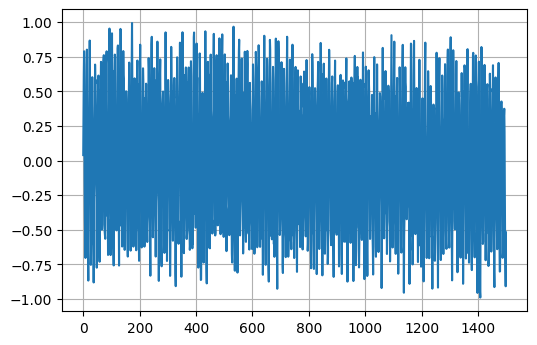

In [7]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc2)
plt.grid()

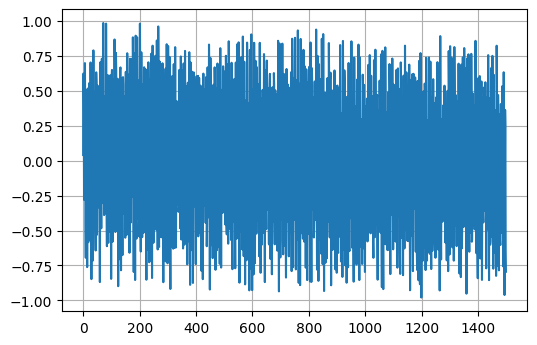

In [16]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc3)
plt.grid()

In [17]:
temp = list(ext_signal_Arc1)
temp2 = list(ext_signal_Arc2)
temp3 = list(ext_signal_Arc3)

s0 = temp + temp2 + temp3
        
sig = np.array(s0) 

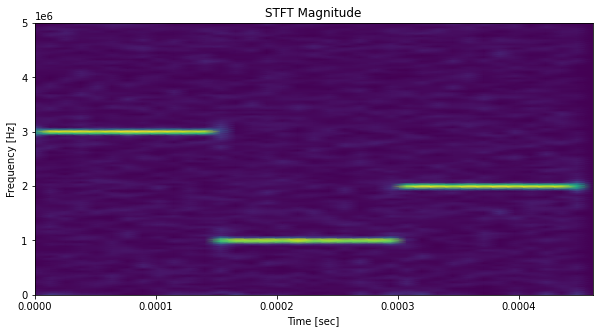

In [27]:
f_axis, t_axis, Zxx = signal.stft(sig, fs = fs)
fig = plt.figure(figsize = (10, 5))
plt.pcolormesh(t_axis, f_axis, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()